<a href="https://colab.research.google.com/github/FaizaAli-Dev/Natural-language-Processing/blob/all-about-AI-and-Data-Science/NLP_Json_data_text_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2023-08-22 20:51:43--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  4.88MB/s    in 1.1s    

2023-08-22 20:51:44 (4.88 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [3]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [6]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 22s - loss: 0.6626 - accuracy: 0.5881 - val_loss: 0.5698 - val_accuracy: 0.7769 - 22s/epoch - 35ms/step
Epoch 2/10
625/625 - 3s - loss: 0.4264 - accuracy: 0.8321 - val_loss: 0.3947 - val_accuracy: 0.8271 - 3s/epoch - 5ms/step
Epoch 3/10
625/625 - 3s - loss: 0.3083 - accuracy: 0.8772 - val_loss: 0.3522 - val_accuracy: 0.8518 - 3s/epoch - 4ms/step
Epoch 4/10
625/625 - 2s - loss: 0.2564 - accuracy: 0.8996 - val_loss: 0.3429 - val_accuracy: 0.8553 - 2s/epoch - 4ms/step
Epoch 5/10
625/625 - 3s - loss: 0.2193 - accuracy: 0.9161 - val_loss: 0.3508 - val_accuracy: 0.8562 - 3s/epoch - 5ms/step
Epoch 6/10
625/625 - 3s - loss: 0.1921 - accuracy: 0.9265 - val_loss: 0.3533 - val_accuracy: 0.8544 - 3s/epoch - 4ms/step
Epoch 7/10
625/625 - 3s - loss: 0.1704 - accuracy: 0.9362 - val_loss: 0.3730 - val_accuracy: 0.8535 - 3s/epoch - 4ms/step
Epoch 8/10
625/625 - 3s - loss: 0.1523 - accuracy: 0.9441 - val_loss: 0.3860 - val_accuracy: 0.8530 - 3s/epoch - 4ms/step
Epoch 9/10
625/625 - 

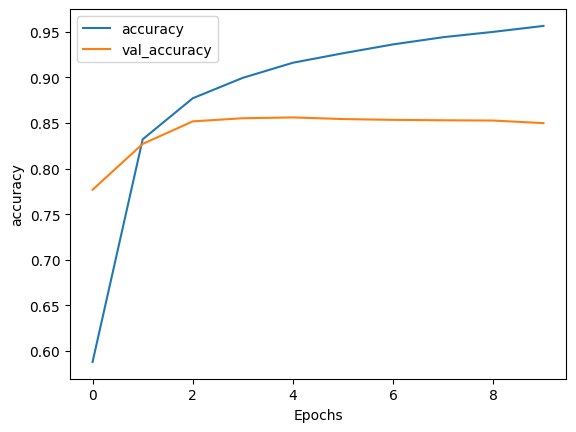

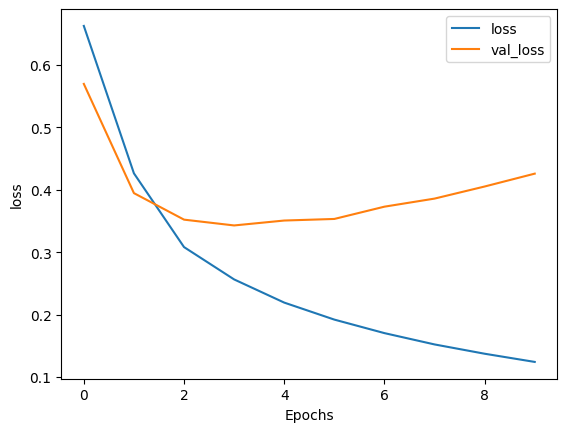

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Now test the model with a manual sentences.

In [10]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 75ms/step
[[0.8072241 ]
 [0.11479162]]


In [11]:
sentence = ["a quick brown fox jump over the lazy dog", "circuit is the path through which current can flow"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 19ms/step
[[0.27285203]
 [0.16102949]]
